In [2]:
import warnings
warnings.filterwarnings('ignore')
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

import numpy as np 
import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D
from scipy.linalg import null_space

In [3]:
%matplotlib widget

# **4 key subspaces in linear algebra**

- *Row space* of $\textbf{A}$
- *Null space*  ``
- *Column space* ``
- *Left nullspace* ``

In [4]:
A = np.matrix(
    [[1,2,3],
    [4,5,6]]
)
O = np.matrix(
    [[0],
    [0],
    [0]]
)

### **Finding vectors that following the application of A, result to a transformation to the origin; a contraction of the null space**

- I.e:
    
    $\textbf{A}\textbf{x} = \textbf{0}$

    where:
    
    $\textbf{x}$ is the null space
<br>

Text(0.5, 0.92, 'Row and null space of $A$')

(0.0, 5.0)

(0.0, 6.0)

(0.0, 8.0)

row and null space of matrix:
 [[1 2 3]
 [4 5 6]]


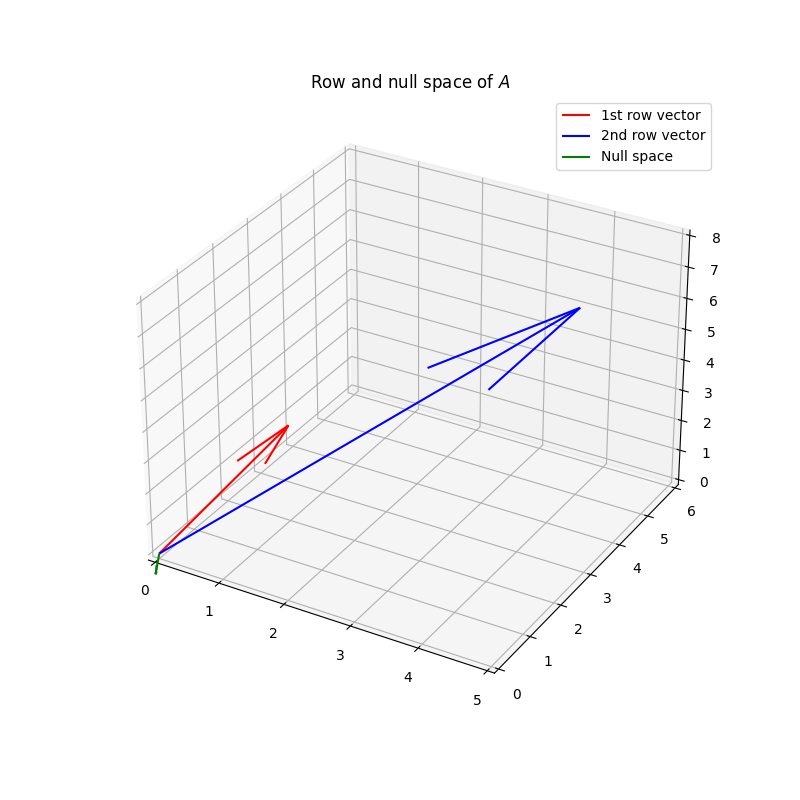

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
ax.set_title("Row and null space of $A$")
ax.set_xlim([0,5])
ax.set_ylim([0,6])
ax.set_zlim([0,8])

row_vec_fmts = [("1st row vector", "r"),("2nd row vector", "b"), ("Null space", "g")]
print("row and null space of matrix:\n",A)
for idx, row in enumerate(A[:,]):
    row = row.tolist()[0]
    ax.quiver(O[0], O[1], O[2], row[0],row[1],row[2], color=row_vec_fmts[idx][1], label=row_vec_fmts[idx][0])


ns_vec = null_space(A)
ns_vec = ns_vec  * np.sign(ns_vec[0,0])
ns_list =[x  for y in ns_vec.tolist() for x in y ]

ax.quiver(O[0], O[1], O[2], ns_list[0],ns_list[1],ns_list[2], color=row_vec_fmts[-1][1], label=row_vec_fmts[-1][0])
plt.legend()

Notice the null space is **orthogonal** to the row space

### **Finding Vectors that following the application of $A^T$, result to a transformation to the origin; a contraction of the left nullspace**

- I.e:
    
    $\textbf{A}^{T}\textbf{x`} = \textbf{0}$

    where:
    
    $\textbf{x`}$ is the leftnull space


Notice

$\textbf{x`}\neq\textbf{x}$


Text(0.5, 0.92, 'Column and left null space of $A$')

(0.0, 5.0)

(0.0, 6.0)

(0.0, 8.0)

Column and lef null space of matrix:
 [[1 4]
 [2 5]
 [3 6]]


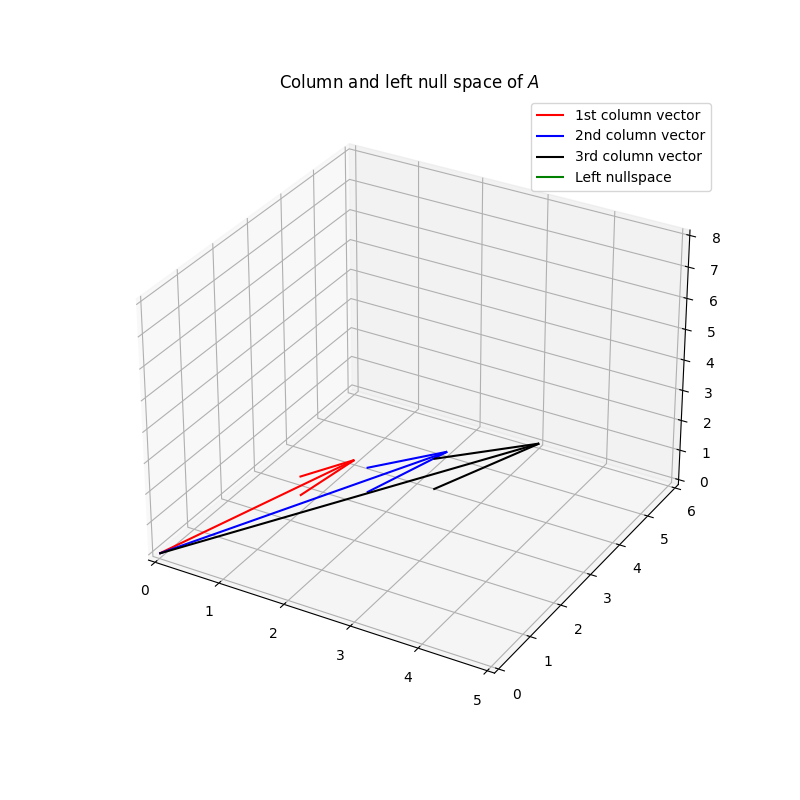

In [6]:
A = np.matrix(
    [[1,2,3],
    [4,5,6]]
)
A = A.transpose()

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
ax.set_title("Column and left null space of $A$")
ax.set_xlim([0,5])
ax.set_ylim([0,6])
ax.set_zlim([0,8])

row_vec_fmts = [("1st column vector", "r"),("2nd column vector", "b"), ("3rd column vector", "k"), ("Left nullspace", "g")]
print("Column and lef null space of matrix:\n",A)
for idx, row in enumerate(A[:,]):
    row = row.tolist()[0]
    ax.quiver(O[0], O[1], O[2], row[0],row[1],0, color=row_vec_fmts[idx][1], label=row_vec_fmts[idx][0])


ns_vec = null_space(A)
ns_vec = O if ns_vec.size == 0 else ns_vec.size
# ns_vec = ns_vec  * np.sign(ns_vec[0,0])
# ns_list =[x  for y in ns_vec.tolist() for x in y ]

ax.quiver(O[0], O[1], O[2], ns_vec[0],ns_vec[1],ns_vec[2], color=row_vec_fmts[-1][1], label=row_vec_fmts[-1][0])
plt.legend()

Notice that the left null space is **zero dimensional**; still **orthogonal** to the subspun by the independent components of the column space. 

### Notice the column space has the same **rank** as the row space; i.e. they all lie in a 2 dimensional plane



row space = $C(\textbf{A}^{T})$

Null space = $N(\textbf{A})$

Column space = $C(\textbf{A})$

Left nullspace = $N(\textbf{A}^{T})$

### Find the eigenvectors and values of the outer and inner product of A:

$\textbf{A}_{inner} = \textbf{A}^{T}\textbf{A}$

$\textbf{A}_{outer} = \textbf{A}\textbf{A}^{T}$

In [7]:
A = np.matrix(
    [[1,2,3],
    [4,5,6]]
)

A_inner = A.T @ A 
A_outer = A @ A.T
print("outer product result:")
A_outer
print("inner product result:")
A_inner

outer product result:


matrix([[14, 32],
        [32, 77]])

inner product result:


matrix([[17, 22, 27],
        [22, 29, 36],
        [27, 36, 45]])

Text(0.5, 0.92, 'Eigenvectors of $A_{inner}$')

(-1.0, 1.0)

(-1.0, 1.0)

(-1.0, 1.0)

Text(0.5, 1.0, 'Eigenvector values of $A_{inner}$')

90.40267252625392

1


0.5973274737460719

2


7.232990573335702e-16

3


Text(0.5, 0, 'Eigen vector index')

Text(0, 0.5, 'Eigen vector value')

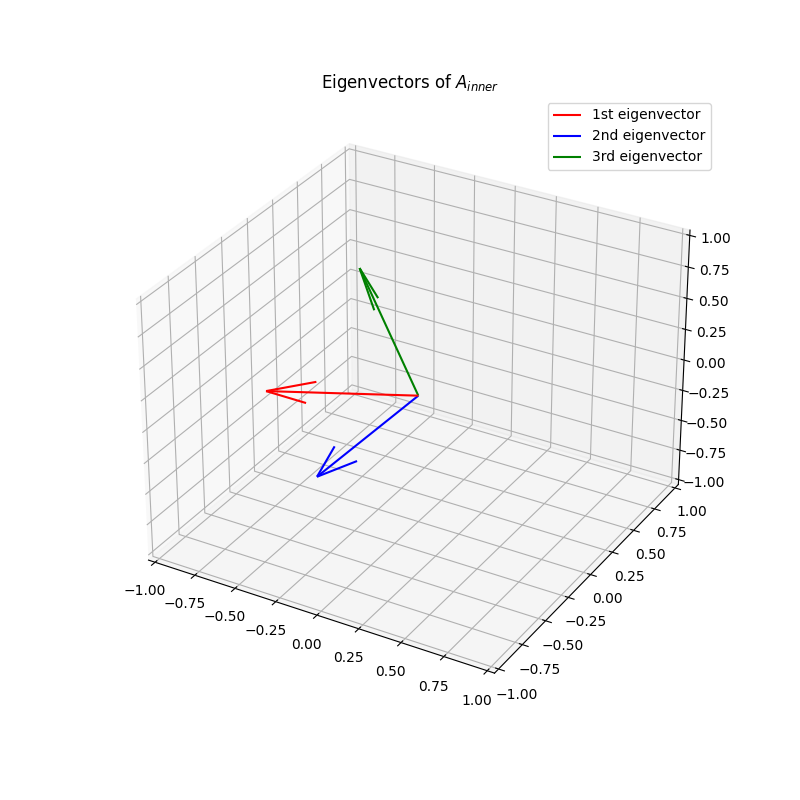

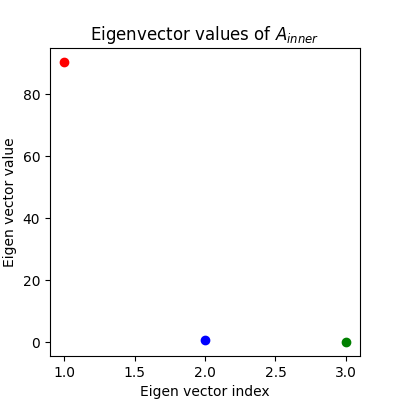

In [8]:

e_ls, e_vecs = np.linalg.eig(A_inner)
# i = 1
# e_vecs[:,i]
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
ax.set_title("Eigenvectors of $A_{inner}$")
ax.set_xlim([-1,1])
ax.set_ylim([-1,1])
ax.set_zlim([-1,1])

vec_fmts = [("1st eigenvector", "r"),("2nd eigenvector", "b"), ("3rd eigenvector", "g")]

for idx, row in enumerate(e_vecs[:,]):
    row = row.tolist()[0]
    ax.quiver(O[0], O[1], O[2], row[0],row[1],row[2], color=vec_fmts[idx][1], label=vec_fmts[idx][0])

plt.legend()
fig = plt.figure(figsize=(4,4))
ax = fig.add_subplot(111)
ax.set_title("Eigenvector values of $A_{inner}$")
vec_fmts = [("1st eigenvalue", "r"),("2nd eigenvalue", "b"), ("3rd eigenvalue", "g")]
evals_col = list(zip(e_ls,vec_fmts ))
for idx, val in enumerate(evals_col, 1):
    val[0]
    print(idx)
    ax.scatter(idx, val[0], label=val[1][0], color= val[1][1])
ax.set_xlabel("Eigen vector index")
ax.set_ylabel("Eigen vector value")

Text(0.5, 0.92, 'Eigenvectors of $A_{outer}$')

(-1.0, 1.0)

(-1.0, 1.0)

(-1.0, 1.0)

Text(0.5, 1.0, 'Eigenvector values of $A_{outer}$')

0.5973274737460628

1


90.40267252625394

2


Text(0.5, 0, 'Eigen vector index')

Text(0, 0.5, 'Eigen vector value')

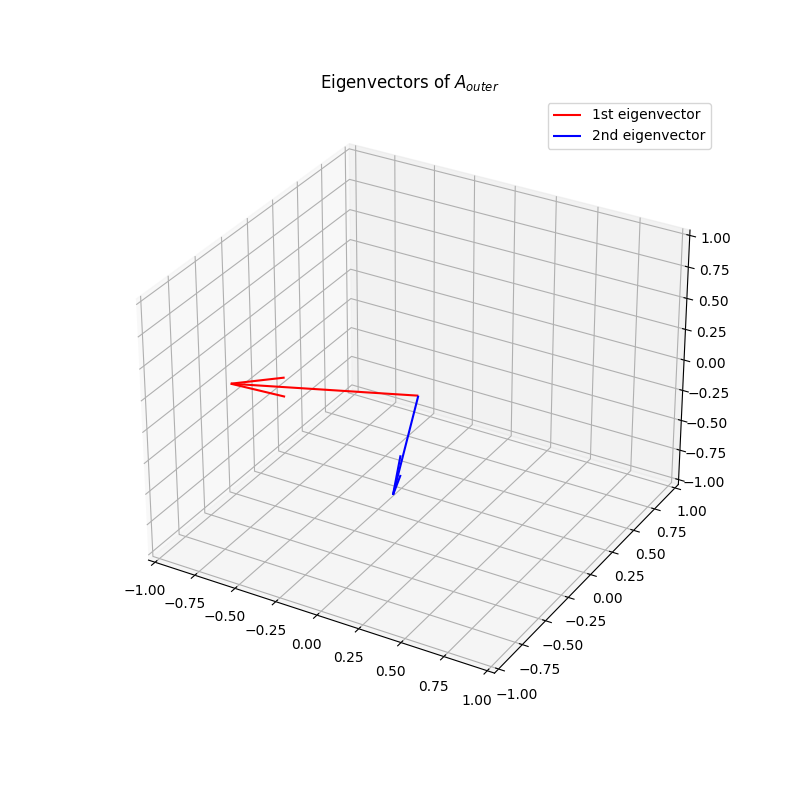

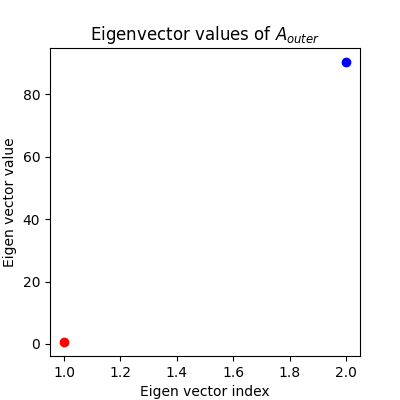

In [9]:
e_ls, e_vecs = np.linalg.eig(A_outer)
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
ax.set_title("Eigenvectors of $A_{outer}$")
ax.set_xlim([-1,1])
ax.set_ylim([-1,1])
ax.set_zlim([-1,1])

vec_fmts = [("1st eigenvector", "r"),("2nd eigenvector", "b")]

for idx, row in enumerate(e_vecs[:,]):
    row = row.tolist()[0]
    ax.quiver(O[0], O[1], O[2], row[0],row[1], 0, color=vec_fmts[idx][1], label=vec_fmts[idx][0])

plt.legend()
fig = plt.figure(figsize=(4,4))
ax = fig.add_subplot(111)
ax.set_title("Eigenvector values of $A_{outer}$")
vec_fmts = [("1st eigenvalue", "r"),("2nd eigenvalue", "b")]
evals_col = list(zip(e_ls,vec_fmts ))
for idx, val in enumerate(evals_col, 1):
    val[0]
    print(idx)
    ax.scatter(idx, val[0], label=val[1][0], color= val[1][1])
ax.set_xlabel("Eigen vector index")
ax.set_ylabel("Eigen vector value")